### Using Simulated Annealing to approximate the global minima of the Himmelbalu function

Read about [Simmulated Annealing](https://en.wikipedia.org/wiki/Simulated_annealing)

Read about [Himmeblau function](https://en.wikipedia.org/wiki/Himmelblau%27s_function)

Based on [Optimization with Metaheuristics](https://www.udemy.com/course/optimization-with-metaheuristics/learn/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.seterr(divide='ignore', over='ignore');

### Himmelblau function
$(x^2 + y - 11)^2 + (x + y^2 -7)^2$

In [3]:
def obj(x, y):
    return ((x ** 2) + y - 11) ** 2 + (x + (y ** 2) - 7) ** 2

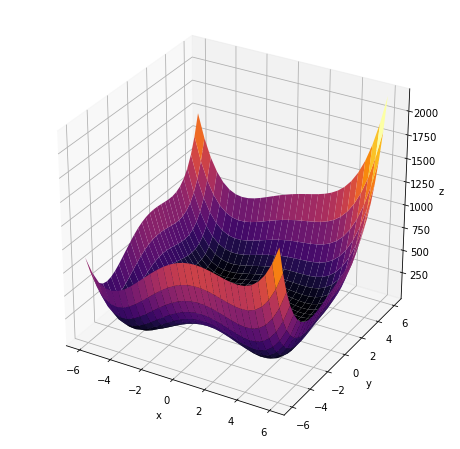

In [4]:
from mpl_toolkits import mplot3d

xs = np.linspace(-6, 6, 30)
ys = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(xs, ys)
Z = obj(X, Y)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='inferno', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

### initial position

In [5]:
x, y = 1,1

### hyperparameters

In [6]:
T0 = 1000 # the temp
M = 150 # num iterations
N = 15 # num neighbors
alpha = 0.85 # factor for decreasing the temp for each increment of M
k = 0.1 

In [7]:
def get_step():
    rand_num_1 = np.random.rand()
    rand_num_2 = np.random.rand()
    
    return rand_num_2 * (k if rand_num_1 >= 0.5 else -k)

In [8]:
temp = [] # to plot the temp
obj_val = [] # to plot the obj vali for each iteration until M
for m in range(M):
    for n in range(N):
        x_temp = x + get_step()
        y_temp = y + get_step()
        
        obj_temp = obj(x_temp, y_temp)
        obj_current = obj(x, y)
        
        rand_num = np.random.rand()
        formula = 1 / (np.exp((obj_temp - obj_current)/T0))
        
        if obj_temp <= obj_current: # minimization problem
            x = x_temp
            y = y_temp
        elif rand_num <= formula:
            x = x_temp
            y = y_temp
        else:
            x = x
            y = y
        
    temp.append(T0)
    obj_val.append(obj_current)
    
    T0 = alpha * T0
    
print("X is %0.3f" % x)
print("Y is %0.3f" % y)
print("obj val is %0.3f" % obj_current)

X is 3.002
Y is 1.994
obj val is 0.001


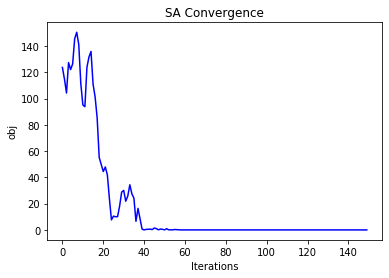

In [9]:
plt.plot(range(M), obj_val, 'b')
plt.title("SA Convergence")
plt.xlabel("Iterations")
plt.ylabel("obj")

plt.show()